Sample of the dataset:


,temperature,humidity,wind_speed,hour,energy_consumption
0,22.490802,31.107976,3.925585,18,107.662194
1,34.014286,52.514057,3.704682,4,430.743424
2,29.639879,72.376750,13.593819,7,309.894255
3,26.973170,63.933493,3.743193,6,410.097621
4,18.120373,68.393669,4.079246,13,193.770240


📊 Model Evaluation:
MAE: 98.02
RMSE: 113.54
R² Score: -0.00


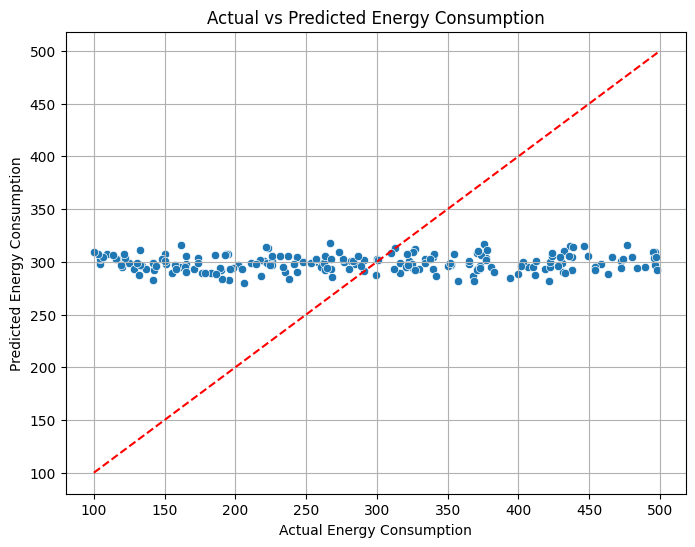


🔍 Prediction for sample input [30 50  5 14]:
Estimated Energy Consumption: 300.72 kWh


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
# 📌 Energy Consumption Prediction Project (Google Colab Version)

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Generate synthetic dataset
np.random.seed(42)
data = pd.DataFrame({
    'temperature': np.random.uniform(15, 35, 1000),
    'humidity': np.random.uniform(20, 80, 1000),
    'wind_speed': np.random.uniform(0, 15, 1000),
    'hour': np.random.randint(0, 24, 1000),
    'energy_consumption': np.random.uniform(100, 500, 1000)
})

# Step 3: Display dataset head
print("Sample of the dataset:")
display(data.head())

# Step 4: Split features and target
X = data.drop('energy_consumption', axis=1)
y = data['energy_consumption']

# Step 5: Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 7: Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📊 Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Step 9: Plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Energy Consumption")
plt.ylabel("Predicted Energy Consumption")
plt.title("Actual vs Predicted Energy Consumption")
plt.grid(True)
plt.show()

# Step 10: Make a sample prediction
sample = np.array([[30, 50, 5, 14]])  # temperature, humidity, wind_speed, hour
sample_scaled = scaler.transform(sample)
sample_pred = model.predict(sample_scaled)

print(f"\n🔍 Prediction for sample input {sample[0]}:")
print(f"Estimated Energy Consumption: {sample_pred[0]:.2f} kWh")
